In [3]:
pip install pmdarima

  Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl (625 kB)
Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl (2.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime
from pmdarima.arima import auto_arima

In [5]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\Users\rafae\AppData\Local\Temp\ipykernel_9264\1255019037.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)


In [6]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
df.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [8]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


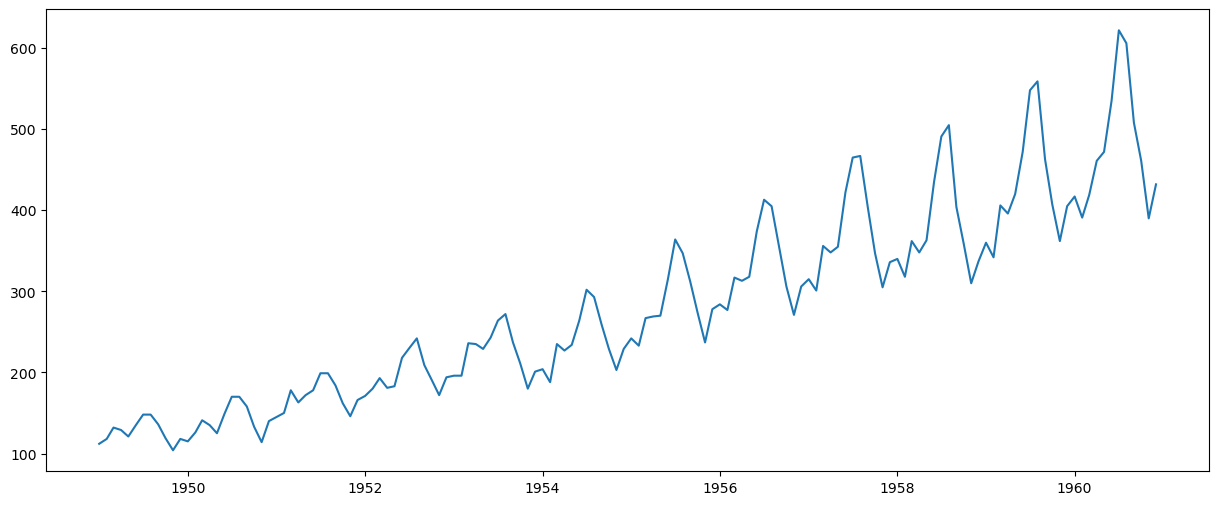

In [9]:
plt.plot(df)

In [31]:
stepwise_model = auto_arima(df, start_p=1,start_q=1,start_d=0, start_P=0,max_p=6,max_q=6,m=12,seasonal=True,traces=True,stepwise=True)

In [32]:
stepwise_model.aic()

1019.1780567487294

In [52]:
train = df.loc['1949-01-01':'1959-12-01']
test = df.loc['1960-01-01':]

In [54]:
train

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [56]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [64]:
# Treinando modelo preditivo
forecast = stepwise_model.predict(n_periods=12)

In [60]:
forecast

1960-01-01    421.153373
1960-02-01    401.605753
1960-03-01    462.083577
1960-04-01    450.826710
1960-05-01    475.124360
1960-06-01    529.774275
1960-07-01    605.741141
1960-08-01    618.774116
1960-09-01    516.769043
1960-10-01    463.571231
1960-11-01    417.168988
1960-12-01    458.049055
Freq: MS, dtype: float64

In [62]:
forecast = pd.DataFrame(forecast,index=test.index,columns=['#Passengers'])

<Axes: >

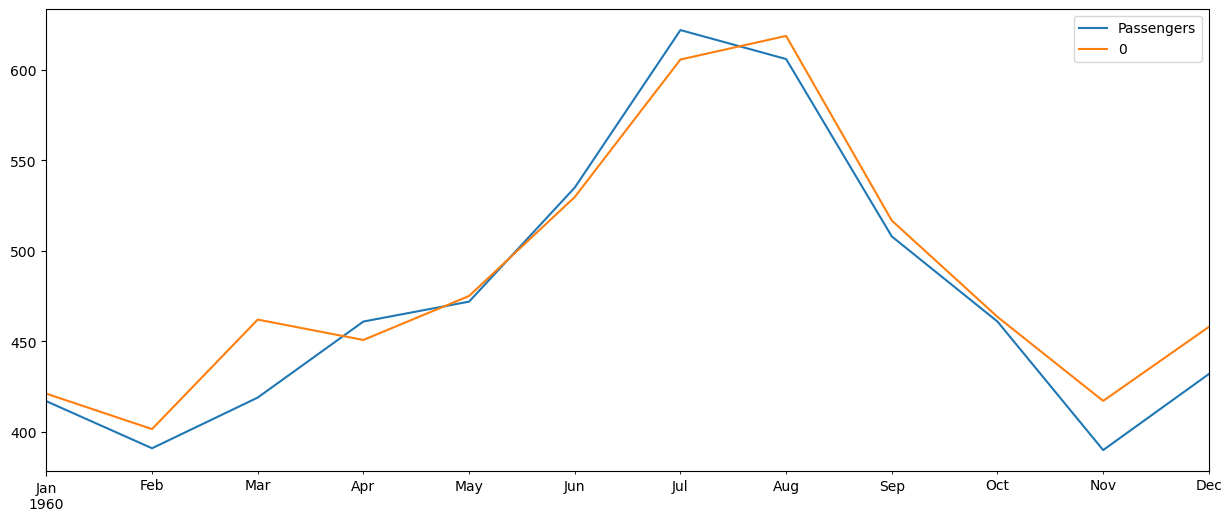

In [68]:
pd.concat([test,forecast],axis=1).plot()

<Axes: >

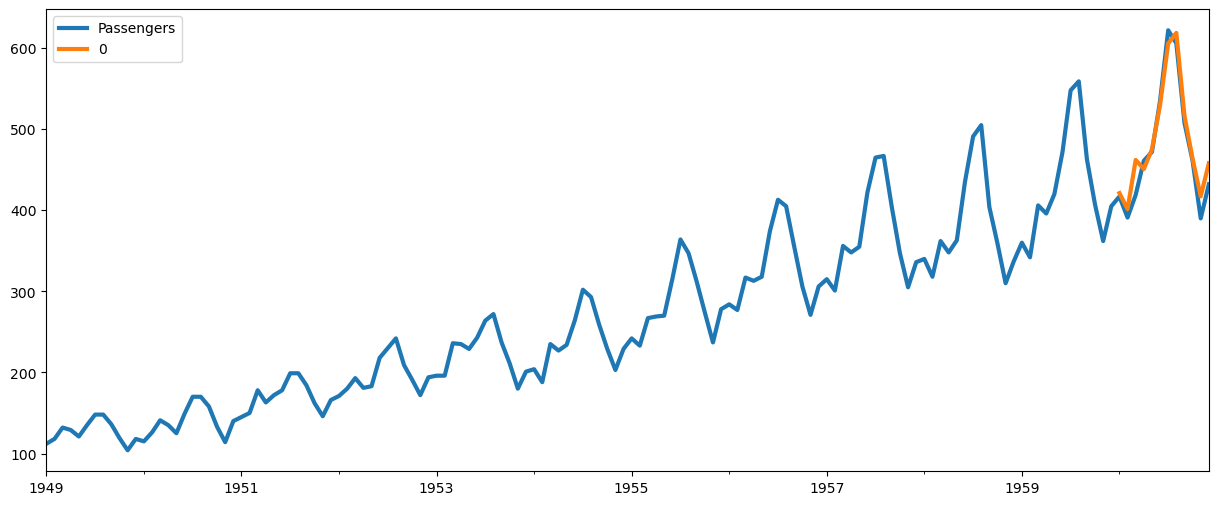

In [70]:
pd.concat([df,forecast],axis=1).plot(linewidth=3)